## ASL_(sign_to_text)_VIT_model_v1

In [ ]:
import torch
import numpy as np
from PIL import Image
from IPython.display import display
from transformers import ViTForImageClassification,AutoFeatureExtractor,ViTImageProcessor  # or the appropriate model class

# Load the model from the output directory
ASL_VIT_model_v1= ViTForImageClassification.from_pretrained("/content/drive/MyDrive/Work_space/Project/Can_You_Hear/Function01/models/ASL_(sign_to_text)_VIT_model_v1")
ASL_VIT_model_v1.eval()

ASL_VIT_model_v1_processor = ViTImageProcessor.from_pretrained("/content/drive/MyDrive/Work_space/Project/Can_You_Hear/Function01/models/ASL_(sign_to_text)_VIT_model_v1")

id2label_ASL_VIT_model_v1 = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'DEL', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K',
            12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'SPACE', 21: 'T', 22: 'U',
            23: 'V', 24: 'W', 25: 'X', 26: 'Y', 27: 'Z'}


def ASL_VIT_model_v1_predict(image_path):

    # Load an image and feature extractor (preprocessing for vision models)
    image = Image.open(image_path)

    # Display the image
    display(image)
    # Preprocess the image
    inputs = ASL_VIT_model_v1_processor(images=image, return_tensors="pt")

    # Get predictions
    with torch.no_grad():
        outputs = ASL_VIT_model_v1(**inputs)
        logits = outputs.logits
        score=np.sum(abs(logits.detach().numpy()))
        #print(score*10)
        predictions = torch.argmax(logits, dim=-1)
        #print(predictions)

    #print(f"Predicted class: {id2label_ASL_VIT_model_v1[predictions.item()]}")
    return id2label_ASL_VIT_model_v1[predictions.item()],score

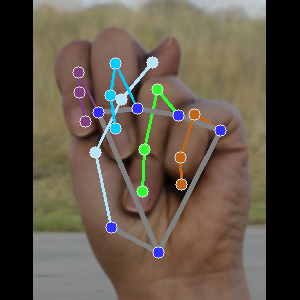

Predicted class: N


'N'

In [ ]:
ASL_VIT_model_v1_predict("/content/13d585a8-cf66-4968-b9c6-089bc21cc24e.rgb_0000.png")